In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
heart = pd.read_csv("../input/heart.csv")

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
y=heart.sex.values
x=heart.drop(["sex"],axis=1)

In [7]:
x = (x - np.min(x))/(np.max(x)-np.min(x)).values # normalizition

In [8]:
#train_and_test_data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [10]:
#initializing parameters and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [11]:
#forward and backward propogation
def forward_backward_propogation(w,b,x_train,y_train):
    #forward
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    #backward
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [12]:
#update parameters
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    #updating(learning) parameters is number of iteration times
    for i in range(number_of_iteration):
        #make forward and backward propogation and find cost,gradients
        cost,gradients=forward_backward_propogation(w,b,x_train,y_train)
        cost_list.append(cost)
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
        if i%10==0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iteration %i : %f" %(i,cost))
    parameters={"weight":w,"bias":b}        
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters,gradients,cost_list

In [13]:
#parameters
def predict(w,b,x_test):
    #x_test is a input for forward propogation
    z=sigmoid(np.dot(w.T,x_test)+b)
    y_prediction=np.zeros((1,x_test.shape[1]))
    #if z>0.5, our prediction is one
    #if z<0.5, our prediction is zero
    for i in range(z.shape[1]):
        if z[0,i]<=0.5 :
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

In [14]:
#implementing logistic regression
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,number_of_iteration):
    #initialize
    dimension=x_train.shape[0]
    w,b= initialize_weights_and_bias(dimension)
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,number_of_iteration)
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train=predict(parameters["weight"],parameters["bias"],x_train)
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    

cost after iteration 0 : -0.191961
cost after iteration 10 : -0.032361
cost after iteration 20 : 0.027956
cost after iteration 30 : 0.051741
cost after iteration 40 : 0.061200
cost after iteration 50 : 0.064886
cost after iteration 60 : 0.066240
cost after iteration 70 : 0.066665
cost after iteration 80 : 0.066735
cost after iteration 90 : 0.066683
cost after iteration 100 : 0.066599
cost after iteration 110 : 0.066517
cost after iteration 120 : 0.066448
cost after iteration 130 : 0.066393
cost after iteration 140 : 0.066349
cost after iteration 150 : 0.066313
cost after iteration 160 : 0.066283
cost after iteration 170 : 0.066257
cost after iteration 180 : 0.066231
cost after iteration 190 : 0.066206
cost after iteration 200 : 0.066178
cost after iteration 210 : 0.066149
cost after iteration 220 : 0.066116
cost after iteration 230 : 0.066079
cost after iteration 240 : 0.066039
cost after iteration 250 : 0.065994
cost after iteration 260 : 0.065944
cost after iteration 270 : 0.065891
c

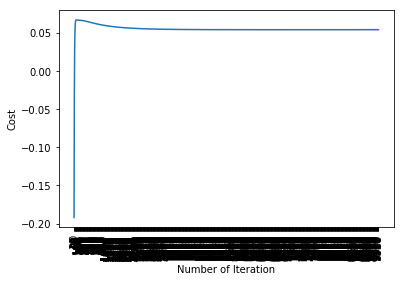

train accuracy: 72.31404958677686 %
test accuracy: 68.85245901639344 %


In [15]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=0.1,number_of_iteration=10000)

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr.score(x_test.T,y_test.T)

0.7540983606557377

In [18]:
lr.score(x_train.T,y_train.T)

0.7272727272727273


You can make them all or you can just write it
And Then I know this accuarcy is very low.But it does not matter.Because this is a exercise.

In [19]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 10000)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

#this section is a summary of the above work

test accuracy: 0.7540983606557377 
train accuracy: 0.7272727272727273 


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
